# Całkowanie Monte Carlo

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Zdefiniujmy funkcję, którą będziemy całkować

In [3]:
def f(x):
    return np.exp(x)

Losujemy punkty z kwadratu 

$$
[a,b] \times [0, max_{x \in [a,b]}\{f(x)\}]
$$

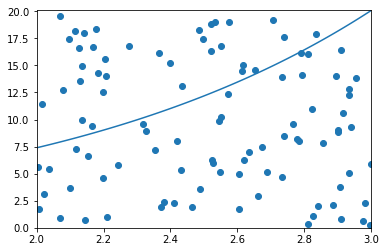

In [4]:
n=100
a=2
b=3
x = np.linspace(a, b, n)
y = f(x)
ymin=0
ymax=np.max(y)
pts = np.column_stack((stats.uniform(a,b-a).rvs(n),stats.uniform(ymin,ymax).rvs(n)))
plt.plot(x, y);
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([a,b])
plt.ylim([ymin, ymax]);
plt.show()

$$
I = \int_{a}^b \psi(x) dx. 
$$

Niech $X_1, \ldots, X_n$ będzie ciągiem niezalizanych zmiennych losowych o rozkładzie jednostajnym na odcinku $[0,1]$, wtedy 

$$
\hat I_n = \frac{1}{n} \sum \psi(X_i)
$$

jest estymatorem nieobciążonym $I$.


# Zadanie
Policz całkę z funkcji $f$ za pomocą powyższego nieobciążonego estymatora na przedziale $[a,b]$ dla różnych wielkości próbek.

In [5]:
for n in 10**np.array([1,2,3,4,5,6,7]):
    pts = stats.uniform(a,b-a).rvs(n)
    sol=np.mean(f(pts))
    print('%10d %.6f' % (n, sol))

        10 12.626750
       100 12.938351
      1000 12.501889
     10000 12.664499
    100000 12.682663
   1000000 12.700358
  10000000 12.698651


## Możesz sprawdzić z wynikiem całkowania numerycznego

In [6]:
from scipy import integrate
integrate.quad(f, a, b)

(12.69648082425702, 1.4095925342801928e-13)

# Przykład 3

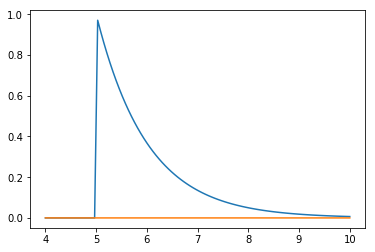

In [68]:
x = np.linspace(4, 10, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x));
plt.show()

In [71]:
h_true =1 - stats.norm().cdf(5)
h_true

2.8665157192353519e-07

In [72]:
n = 10000
y = stats.norm().rvs(n)
h_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0, 1.0)

In [73]:
n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
h_is, np.abs(h_is- h_true)/h_true

(2.8719661630092226e-07, 0.0019014177167410086)

# Przykład 4

In [57]:
def f(x):
    return np.exp(x)

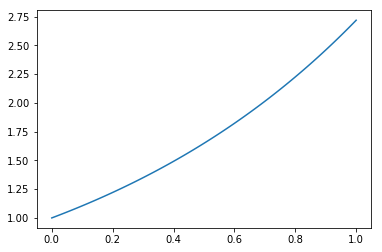

In [58]:
x = np.linspace(0, 1, 100)
plt.plot(x, f(x));
plt.show()

In [59]:
from sympy import sin, cos, symbols, integrate

x = symbols('x')
integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(6)

0.0202549

In [25]:
n = 100
reps = 1000

In [26]:
x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

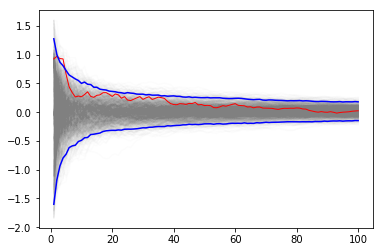

In [27]:
plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');
plt.show()

In [29]:
x.shape

(100, 1000)

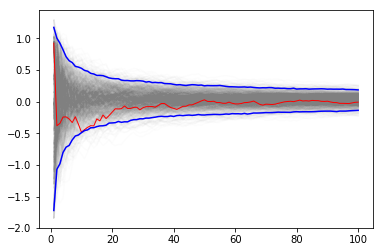

In [32]:
xb = np.random.choice(x[:,0], (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');
plt.show()

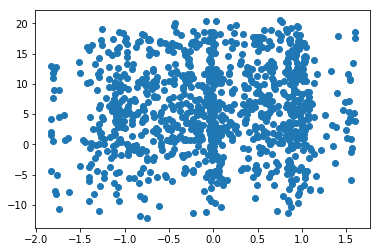

In [46]:
plt.plot(x[1],np.cumsum(x[1], axis=0),'o')
plt.show()

In [43]:
x[1]

array([  1.01603349e+00,  -4.84779022e-01,   4.96662474e-02,
         2.07178733e-01,  -1.39293274e+00,   7.44591694e-01,
         1.26943951e+00,   1.03212085e+00,   9.86006274e-01,
        -2.27216812e-01,   2.16023478e-01,   1.13449428e+00,
         3.83122636e-01,  -2.11894888e-02,  -1.00851680e+00,
        -3.05033044e-01,   1.26431407e+00,   1.07341234e+00,
        -5.91069070e-01,   1.00031008e+00,   4.11584360e-01,
        -7.98875988e-01,  -1.34960205e-01,  -1.07527706e+00,
        -4.99920486e-01,  -4.69331856e-01,   1.06649192e+00,
         6.38920310e-01,  -2.93308579e-01,  -2.33130526e-02,
        -1.07796370e+00,   5.35164947e-01,   5.40454642e-01,
         8.75852000e-01,  -1.91276039e-02,   9.58017722e-01,
        -1.14457139e+00,   4.96276660e-02,  -3.72651577e-01,
         3.69426972e-01,   1.04491014e+00,   5.98829222e-01,
         6.16525719e-01,  -3.79022417e-01,  -1.27623116e+00,
         6.69051781e-01,  -7.94406176e-01,   1.62960264e-02,
         2.39259268e-01,